In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset (replace the path with your actual file path)
df = pd.read_csv(r"C:\Users\siyag\Downloads\cleaneddata.csv")

In [3]:
# Step 2: Rename columns (if needed, assuming they are now in lowercase)
df.columns = ['Customer', 'OverallSatisfaction', 'FoodQuality', 'SpeedSatisfaction', 'OrderAccuracy']

In [4]:
# Step 3: Fill missing values in 'OrderAccuracy' column with True (as per your update)
df['OrderAccuracy'].fillna(True, inplace=True)

C:\Users\siyag\AppData\Local\Temp\ipykernel_30152\634702773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OrderAccuracy'].fillna(True, inplace=True)


In [5]:
# Step 4: Check for missing values after filling
print(f"Missing values in each column after filling 'OrderAccuracy' column:\n{df.isnull().sum()}")

Missing values in each column after filling 'OrderAccuracy' column:
Customer               0
OverallSatisfaction    0
FoodQuality            0
SpeedSatisfaction      0
OrderAccuracy          0
dtype: int64


In [6]:
# Step 5: Define features (X) and target (y)
X = df[['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']]  # Features
y = df['OrderAccuracy']  # Target


In [7]:
# Step 6: Preprocessing
# Define preprocessing steps
numerical_features = ['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']
categorical_features = []  # No categorical features to preprocess


In [8]:
# Preprocessing for numerical data: impute missing values with median and standardize
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

In [9]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])


In [10]:
# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 8: Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

In [12]:
# Step 9: Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['FoodQuality',
                                                   'SpeedSatisfaction',
                                                   'OverallSatisfaction'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [13]:
# Step 10: Predict and evaluate the model
y_pred = pipeline.predict(X_test)

In [14]:
# Step 11: Print the evaluation metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy Score: 0.7335
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       566
        True       0.73      1.00      0.85      1558

    accuracy                           0.73      2124
   macro avg       0.37      0.50      0.42      2124
weighted avg       0.54      0.73      0.62      2124



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


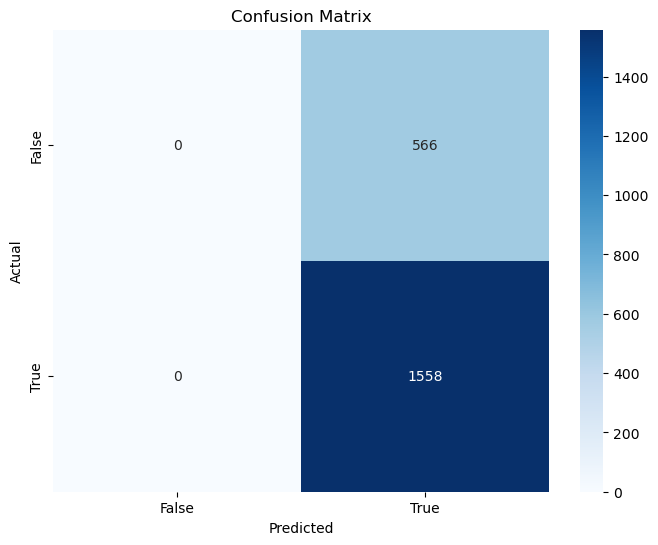

In [15]:
# Step 12: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Step 13: If class imbalance exists, apply SMOTE (Optional)
# Check class distribution in the target variable
print(f"Class distribution in the target variable:\n{y_train.value_counts()}")

Class distribution in the target variable:
OrderAccuracy
True     6213
False    2279
Name: count, dtype: int64


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])


In [20]:
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['FoodQuality',
                                                   'SpeedSatisfaction',
                                                   'OverallSatisfaction'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [21]:
y_pred_rf = rf_pipeline.predict(X_test)

In [22]:
# Step 13: Print the evaluation metrics for Random Forest
print("Random Forest:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest:
Accuracy Score: 0.7335
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       566
        True       0.73      1.00      0.85      1558

    accuracy                           0.73      2124
   macro avg       0.37      0.50      0.42      2124
weighted avg       0.54      0.73      0.62      2124



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

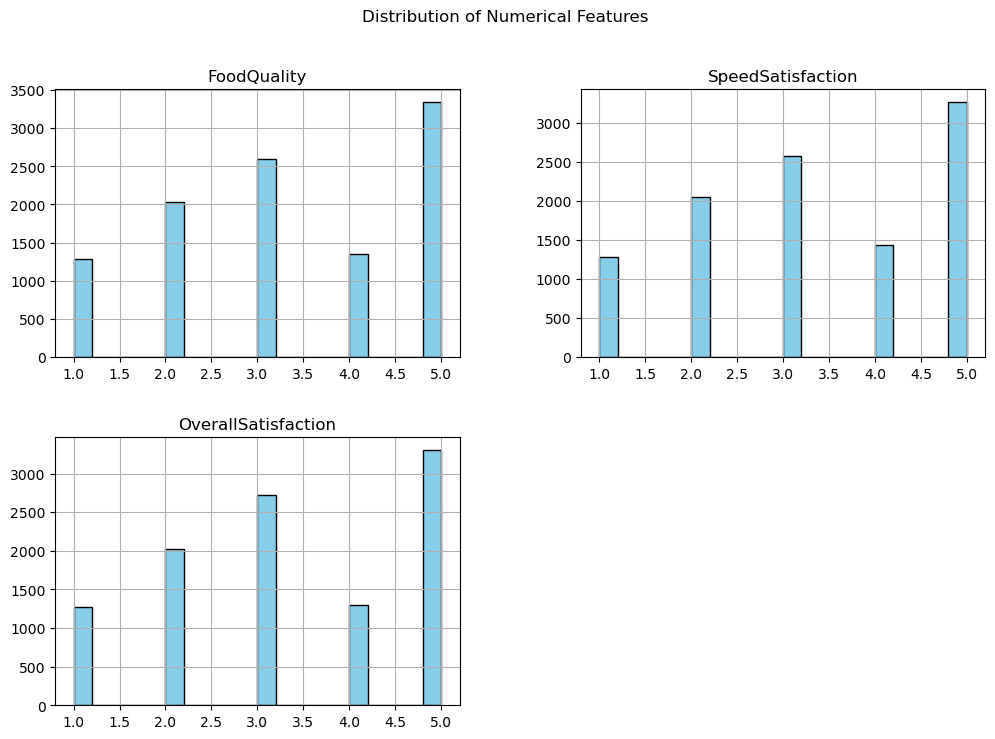

In [25]:
# 5.1: Distribution of Numerical Variables (Histograms)
plt.figure(figsize=(12, 8))
df[['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']].hist(bins=20, color='skyblue', edgecolor='black', figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

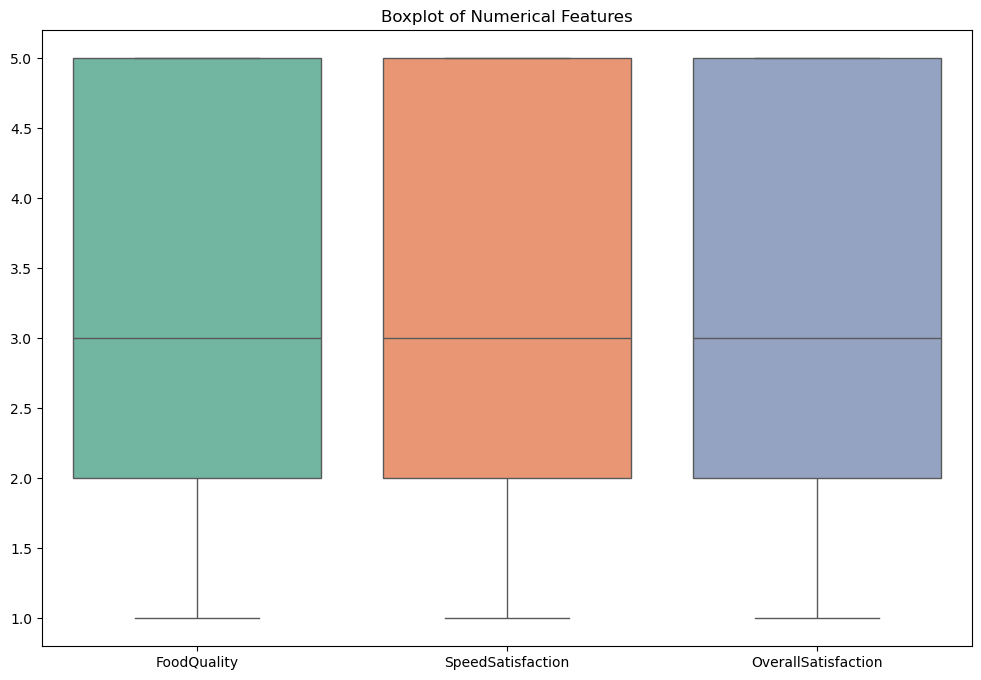

In [26]:
# 5.2: Boxplot to check for outliers in numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']], palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.show()

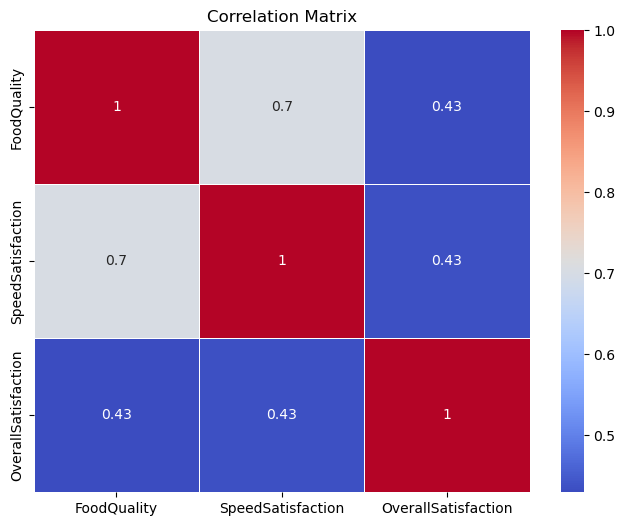

In [27]:
# 5.3: Correlation Matrix
correlation_matrix = df[['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\siyag\AppData\Local\Temp\ipykernel_30152\1417822898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OrderAccuracy', data=df, palette='Set1')


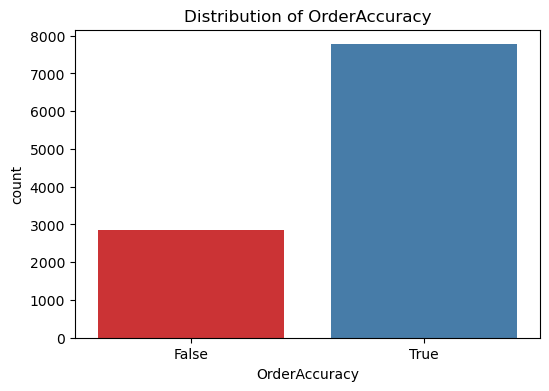

In [28]:
# 5.4: Distribution of Target Variable (OrderAccuracy)
plt.figure(figsize=(6, 4))
sns.countplot(x='OrderAccuracy', data=df, palette='Set1')
plt.title('Distribution of OrderAccuracy')
plt.show()

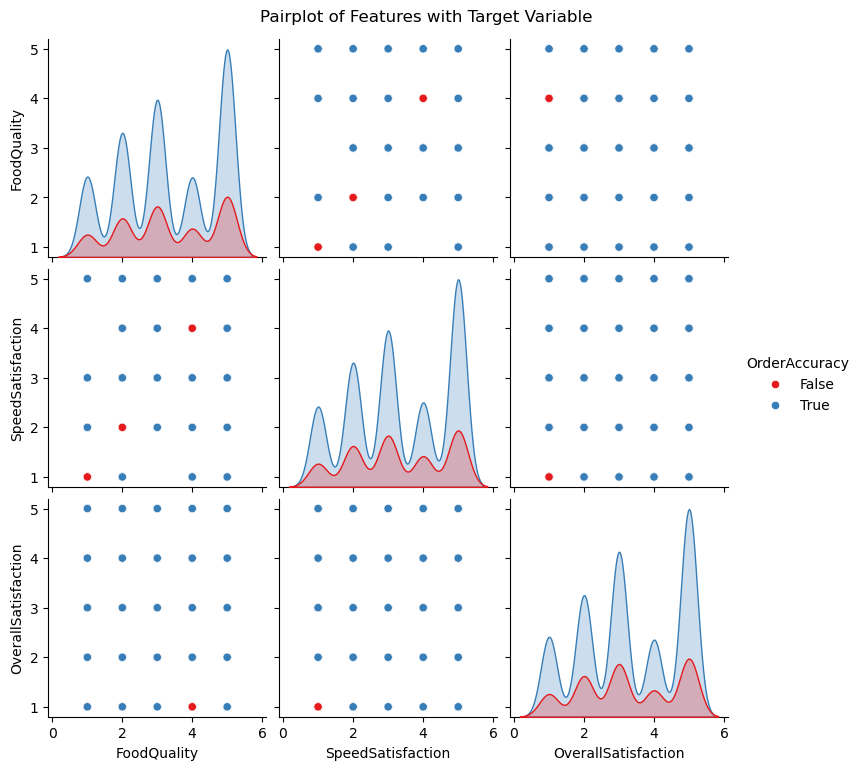

In [29]:
# 5.5: Pairplot (Optional but good for understanding relationships between features)
sns.pairplot(df[['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction', 'OrderAccuracy']], hue='OrderAccuracy', palette='Set1')
plt.suptitle('Pairplot of Features with Target Variable', y=1.02)
plt.show()